<h1> To compare the time required to sort different types of list of different lengths<h1/>

<h2> <strong>Step 0</strong> : Importing essential libraries</h2>

In [1]:
import timeit
import matplotlib.pyplot as plt
import random

<h2> <strong>Step 1</strong> : Defining our functions</h2>

<h3> <strong>Step 1.1</strong> : Defining a Time function</h3>

In [2]:
#Function to check for time-taken
def time(com):
    return timeit.timeit(com, number=1, globals=globals())

<h3> <strong>Step 1.2</strong> : Defining the sorting algorithms</h3>

<h4>1. Insert Sort</h4>

In [3]:
def insert_sort(arr):
    for i in range(1, len(arr)):
        x = arr[i]
        j = i - 1
        while j >= 0 and (x< arr[j]): 
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = x
    return arr 

In [4]:
insert_sort([6,5,5,4,2,1])

[1, 2, 4, 5, 5, 6]

<h4>2. Merge Sort</h4>

In [5]:
def merge(a,b):
    d = [None for x in range(0,len(b) + len(a))]
    i =0
    j =0
    for k in range(0,len(d)):
        if i>=len(a) :
            d[k] = b[j]
            j=j+1
            continue
        if j>=len(b) :
            d[k] = a[i]
            i=i+1
            continue    
        if a[i] < b[j] :
            d[k] = a[i]
            i = i+1
        else:
            d[k] = b[j]
            j = j+1
    return d     

def merge_sort(A,m,n):
    if (n-m)  == 1:
        return [A[m]]
    else:
        p =(m+n)//2
        B = merge_sort(A,m,p)
        C = merge_sort(A,p,n)
        D = merge(B,C)
        return D    
        
def merge_sort_all(A):
    return merge_sort(A,0,len(A))

In [6]:
merge_sort_all([6,5,5,4,2,1])

[1, 2, 4, 5, 5, 6]

<h4>3. Bubble Sort</h4>

In [7]:
def bub_sort(arr):
    ctr = 0
    for i in range(0,len(arr)-1):
        for j in range(0,len(arr)-i-1):
            if arr[j]>arr[j+1]:
                ctr =ctr + 1
                arr[j],arr[j+1]=arr[j+1],arr[j]
        if ctr == 0 : break        
    return arr            

In [8]:
bub_sort([5,41,1,5,6,8,2,3])

[1, 2, 3, 5, 5, 6, 8, 41]

<h3> <strong>Step 1.3</strong> : Defining the list generation algorithms</h3>

In [9]:
# Returns a sorted array
def gen_sort_list(length):
    return [i for i in range(length)]

In [10]:
gen_sort_list(5)

[0, 1, 2, 3, 4]

In [11]:
# Returns a reverse sorted list
def gen_rev_list(length):
    return [(length-i-1) for i in range(length)]

In [12]:
gen_rev_list(5)

[4, 3, 2, 1, 0]

In [13]:
#Returns a randomized list
def gen_rand_list(length):
    return [random.randrange(0,length) for i in range(length)]

In [14]:
gen_rand_list(5)

[4, 4, 2, 2, 0]

<h2> <strong>Step 2</strong> : Generating the strings required for the time function</h2>

In [15]:
'''
Function takes two parameters, number of time strings (eg. insert_sort("AVBCD")) to and 
the function to generate the strings (gen_sort_list or gen_rev_list or gen_rand_list)
'''
def time_strings(length,gen_list):    
    time_insert_strings = ['insert_sort({})'.format(gen_list(i)) for i in range(1,length+1)] 
    time_bub_strings = ['bub_sort({})'.format(gen_list(i)) for i in range(1,length+1)]
    time_merge_strings = ['merge_sort_all({})'.format(gen_list(i)) for i in range(1,length+1)]
    lengths = [i+1 for i in range(length)] #x's
    return [time_insert_strings,time_bub_strings,time_merge_strings,lengths]
#time_default_strings = ['insert_sort({})'.format(gen_sort_list(i)) for i in range(1,100)]

In [16]:
time_strings(10,gen_sort_list)

[['insert_sort([0])',
  'insert_sort([0, 1])',
  'insert_sort([0, 1, 2])',
  'insert_sort([0, 1, 2, 3])',
  'insert_sort([0, 1, 2, 3, 4])',
  'insert_sort([0, 1, 2, 3, 4, 5])',
  'insert_sort([0, 1, 2, 3, 4, 5, 6])',
  'insert_sort([0, 1, 2, 3, 4, 5, 6, 7])',
  'insert_sort([0, 1, 2, 3, 4, 5, 6, 7, 8])',
  'insert_sort([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])'],
 ['bub_sort([0])',
  'bub_sort([0, 1])',
  'bub_sort([0, 1, 2])',
  'bub_sort([0, 1, 2, 3])',
  'bub_sort([0, 1, 2, 3, 4])',
  'bub_sort([0, 1, 2, 3, 4, 5])',
  'bub_sort([0, 1, 2, 3, 4, 5, 6])',
  'bub_sort([0, 1, 2, 3, 4, 5, 6, 7])',
  'bub_sort([0, 1, 2, 3, 4, 5, 6, 7, 8])',
  'bub_sort([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])'],
 ['merge_sort_all([0])',
  'merge_sort_all([0, 1])',
  'merge_sort_all([0, 1, 2])',
  'merge_sort_all([0, 1, 2, 3])',
  'merge_sort_all([0, 1, 2, 3, 4])',
  'merge_sort_all([0, 1, 2, 3, 4, 5])',
  'merge_sort_all([0, 1, 2, 3, 4, 5, 6])',
  'merge_sort_all([0, 1, 2, 3, 4, 5, 6, 7])',
  'merge_sort_all([0, 1, 2, 3, 4, 

In [17]:
time_strings(10,gen_rev_list)

[['insert_sort([0])',
  'insert_sort([1, 0])',
  'insert_sort([2, 1, 0])',
  'insert_sort([3, 2, 1, 0])',
  'insert_sort([4, 3, 2, 1, 0])',
  'insert_sort([5, 4, 3, 2, 1, 0])',
  'insert_sort([6, 5, 4, 3, 2, 1, 0])',
  'insert_sort([7, 6, 5, 4, 3, 2, 1, 0])',
  'insert_sort([8, 7, 6, 5, 4, 3, 2, 1, 0])',
  'insert_sort([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])'],
 ['bub_sort([0])',
  'bub_sort([1, 0])',
  'bub_sort([2, 1, 0])',
  'bub_sort([3, 2, 1, 0])',
  'bub_sort([4, 3, 2, 1, 0])',
  'bub_sort([5, 4, 3, 2, 1, 0])',
  'bub_sort([6, 5, 4, 3, 2, 1, 0])',
  'bub_sort([7, 6, 5, 4, 3, 2, 1, 0])',
  'bub_sort([8, 7, 6, 5, 4, 3, 2, 1, 0])',
  'bub_sort([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])'],
 ['merge_sort_all([0])',
  'merge_sort_all([1, 0])',
  'merge_sort_all([2, 1, 0])',
  'merge_sort_all([3, 2, 1, 0])',
  'merge_sort_all([4, 3, 2, 1, 0])',
  'merge_sort_all([5, 4, 3, 2, 1, 0])',
  'merge_sort_all([6, 5, 4, 3, 2, 1, 0])',
  'merge_sort_all([7, 6, 5, 4, 3, 2, 1, 0])',
  'merge_sort_all([8, 7, 6, 5, 4, 

<h2> <strong>Step 3</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the best case (sorted list)</h2>

In [18]:
strings = time_strings(1000,gen_sort_list)
time_insert_sort=[time(str) for str in  strings[0]]
time_bub_sort=[time(str) for str in  strings[1]]
time_merge_sort=[time(str) for str in  strings[2]]
lengths = strings[3]

<h2> <strong>Step 3.1</strong> : Plotting the values for the best case</h2>

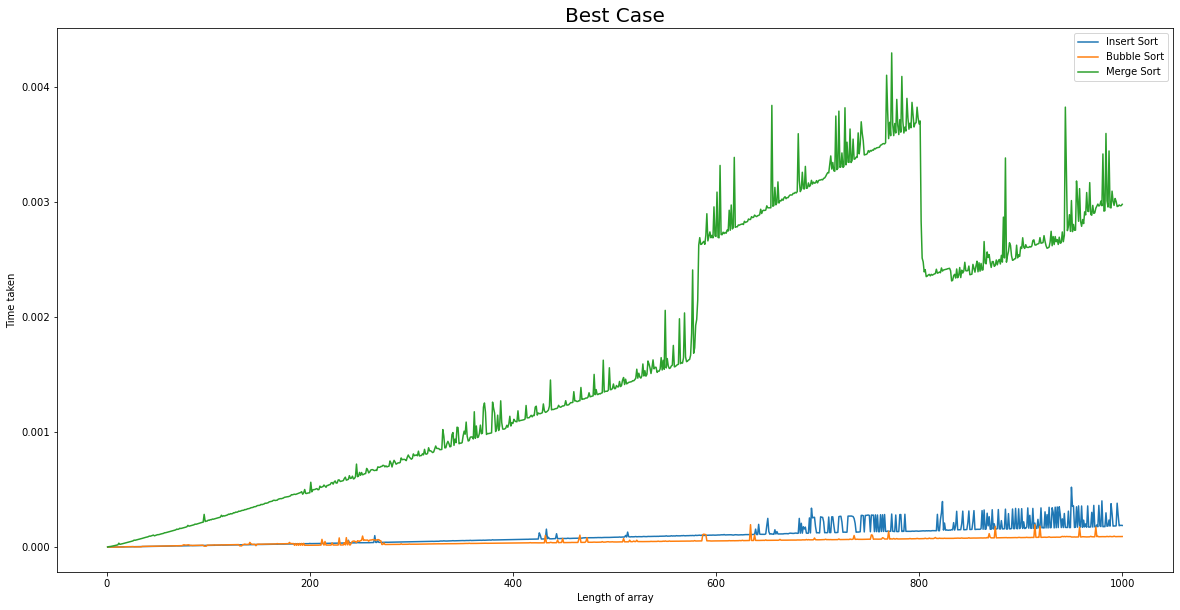

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Best Case',size=20)
plt.xlabel('Length of array')
plt.ylabel('Time taken')
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend()

<h2> <strong>Step 4</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the worst case (reverse list)</h2>

In [20]:
strings = time_strings(1000,gen_rev_list)
time_insert_sort=[time(str) for str in  strings[0]]
time_bub_sort=[time(str) for str in  strings[1]]
time_merge_sort=[time(str) for str in  strings[2]]
lengths = strings[3]

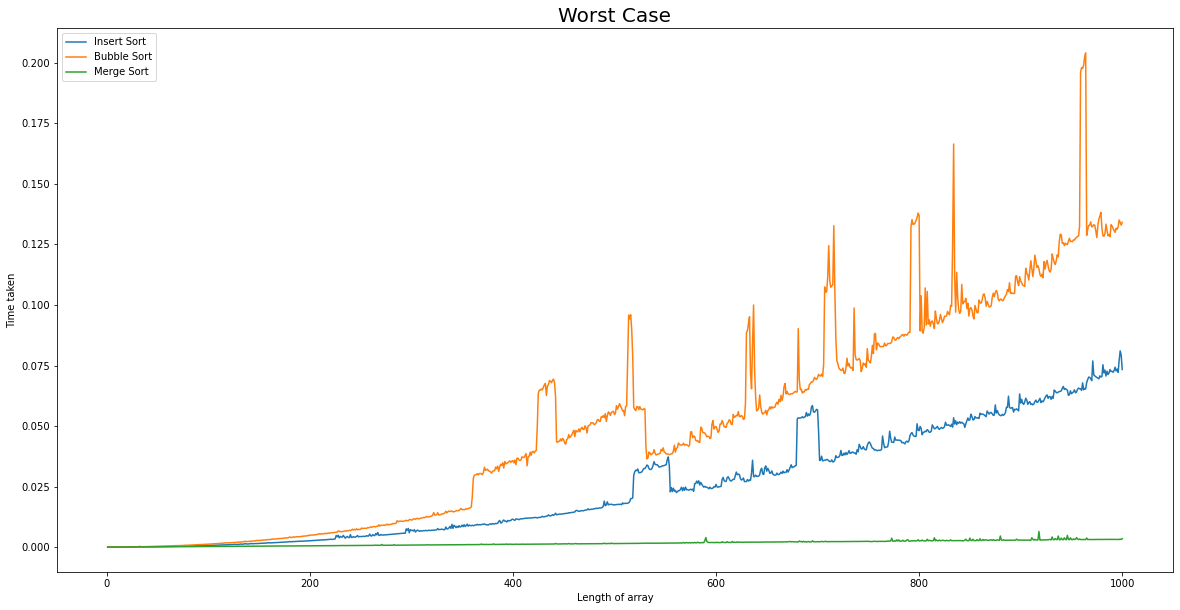

In [21]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Worst Case',size=20)
plt.xlabel('Length of array')
plt.ylabel('Time taken')
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend()

<h2> <strong>Step 4</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the average case (random list)</h2>

In [22]:
strings = time_strings(80,gen_rand_list)
time_insert_sort=[time(str) for str in  strings[0]]
time_bub_sort=[time(str) for str in  strings[1]]
time_merge_sort=[time(str) for str in  strings[2]]
lengths = strings[3]

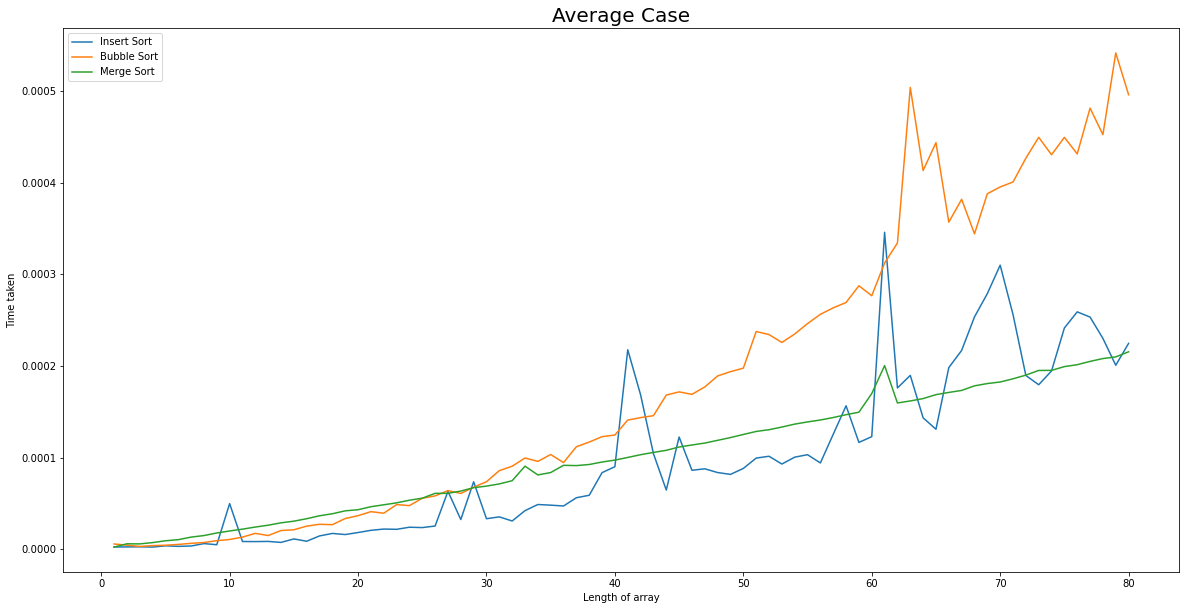

In [23]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Average Case',size=20)
plt.xlabel('Length of array')
plt.ylabel('Time taken')
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend()